**The flow of the Notebook:**

1. Description of the Problem Statement.

2. International Airline Passengers prediction Dataset Loading.

3. Check The Dataset.

4. Visualize The Dataset

5. Split data into train and test

6. Build a Simple Feed Forward Neural Network.

7. Train The Model.

8. Make Prediction

9. Calculate RMSE

10. Forecasting and Visualization

**Problem Statement:**

International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Load The Dataset**

In [3]:
# Load the dataset
data = read_csv('data/AirPassengers.csv', usecols=[1])

**Visualize The Dataset**

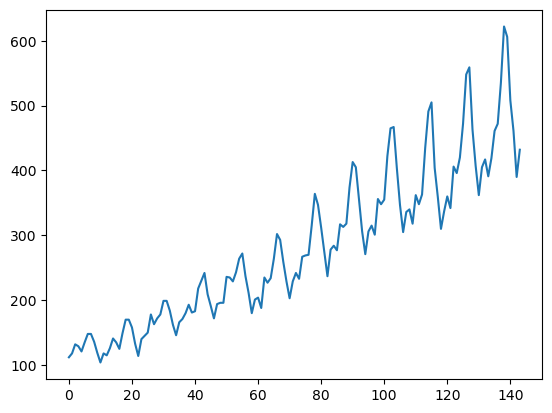

In [4]:
plt.plot(data)

In [5]:
# Convert pandas dataframe to numpy array
dataset = data.values
dataset = data.astype('float32')  # Convert values to float

In [6]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

**Split data into train and test**

In [7]:
# Split into train and test sets

train_size = int(len(dataset)*0.66)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
# Define the sequence size
seq_size = 10

In [10]:
# Create sequences for training and testing
def to_sequences(dataset,seq_size=1):
    x=[]
    y=[]
    
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size),0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x),np.array(y)

In [11]:
trainX, trainY = to_sequences(train,seq_size)
testX, testY = to_sequences(test,seq_size)

**Build a Feed Forward Neural Network**

In [13]:
# Build the model using Functional API
input_layer = Input(shape=(seq_size,))
dense_1 = Dense(units=64, activation='relu')(input_layer)
dense_2 = Dense(units=32,activation='relu')(dense_1)
output_layer = Dense(1)(dense_2)

In [14]:
model = Model(inputs = input_layer,outputs= output_layer)

**Compile The Model**

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])

In [16]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


**Train The Model**

In [17]:
# Train the model
model.fit(trainX,trainY,validation_data=(testX,testY),verbose=2,epochs=100)

Epoch 1/100
3/3 - 2s - loss: 0.1146 - acc: 0.0119 - val_loss: 0.5333 - val_acc: 0.0000e+00 - 2s/epoch - 587ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0755 - acc: 0.0119 - val_loss: 0.3626 - val_acc: 0.0000e+00 - 72ms/epoch - 24ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0493 - acc: 0.0119 - val_loss: 0.2416 - val_acc: 0.0000e+00 - 80ms/epoch - 27ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0312 - acc: 0.0119 - val_loss: 0.1564 - val_acc: 0.0000e+00 - 81ms/epoch - 27ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0191 - acc: 0.0119 - val_loss: 0.0979 - val_acc: 0.0000e+00 - 81ms/epoch - 27ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0115 - acc: 0.0119 - val_loss: 0.0579 - val_acc: 0.0000e+00 - 75ms/epoch - 25ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0070 - acc: 0.0119 - val_loss: 0.0339 - val_acc: 0.0263 - 77ms/epoch - 26ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0055 - acc: 0.0119 - val_loss: 0.0229 - val_acc: 0.0263 - 76ms/epoch - 25ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0061 - acc: 0.0119 - val_loss: 0.0198 - val_acc: 0

Epoch 74/100
3/3 - 0s - loss: 8.5972e-04 - acc: 0.0119 - val_loss: 0.0043 - val_acc: 0.0263 - 85ms/epoch - 28ms/step
Epoch 75/100
3/3 - 0s - loss: 8.3981e-04 - acc: 0.0119 - val_loss: 0.0043 - val_acc: 0.0263 - 79ms/epoch - 26ms/step
Epoch 76/100
3/3 - 0s - loss: 8.3402e-04 - acc: 0.0119 - val_loss: 0.0042 - val_acc: 0.0263 - 84ms/epoch - 28ms/step
Epoch 77/100
3/3 - 0s - loss: 8.0468e-04 - acc: 0.0119 - val_loss: 0.0042 - val_acc: 0.0263 - 94ms/epoch - 31ms/step
Epoch 78/100
3/3 - 0s - loss: 8.2106e-04 - acc: 0.0119 - val_loss: 0.0040 - val_acc: 0.0263 - 90ms/epoch - 30ms/step
Epoch 79/100
3/3 - 0s - loss: 7.8000e-04 - acc: 0.0119 - val_loss: 0.0039 - val_acc: 0.0263 - 91ms/epoch - 30ms/step
Epoch 80/100
3/3 - 0s - loss: 7.6979e-04 - acc: 0.0119 - val_loss: 0.0038 - val_acc: 0.0263 - 80ms/epoch - 27ms/step
Epoch 81/100
3/3 - 0s - loss: 7.5283e-04 - acc: 0.0119 - val_loss: 0.0037 - val_acc: 0.0263 - 64ms/epoch - 21ms/step
Epoch 82/100
3/3 - 0s - loss: 7.5063e-04 - acc: 0.0119 - val_los

**Make Prediction**

In [20]:
# Make predictions
trainPredict = model.predict(trainX)
#print(trainPredict)
testPredict = model.predict(testX)
#print(testPredict)

2/2 [==============================] - 0s 4ms/step


In [30]:
# Invert the scaling to get RMSE
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

**Calculate RMSE**

In [31]:
# Calculate RMSE
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 62624125.44 RMSE


In [32]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 114623543.73 RMSE


**Forecasting and Visualization**

In [33]:
# Shift predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (seq_size * 2) + 1:len(dataset) - 1, :] = testPredict

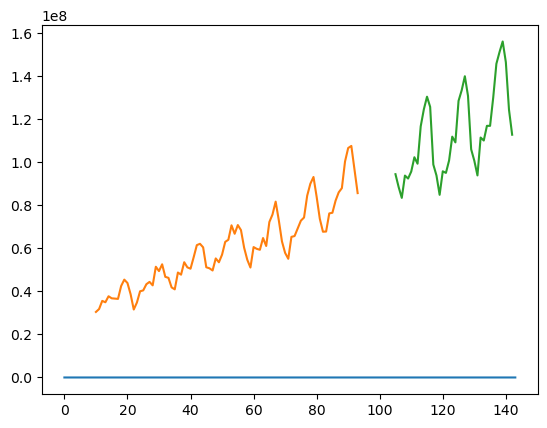

In [34]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()